#Assignment 5

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [9]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

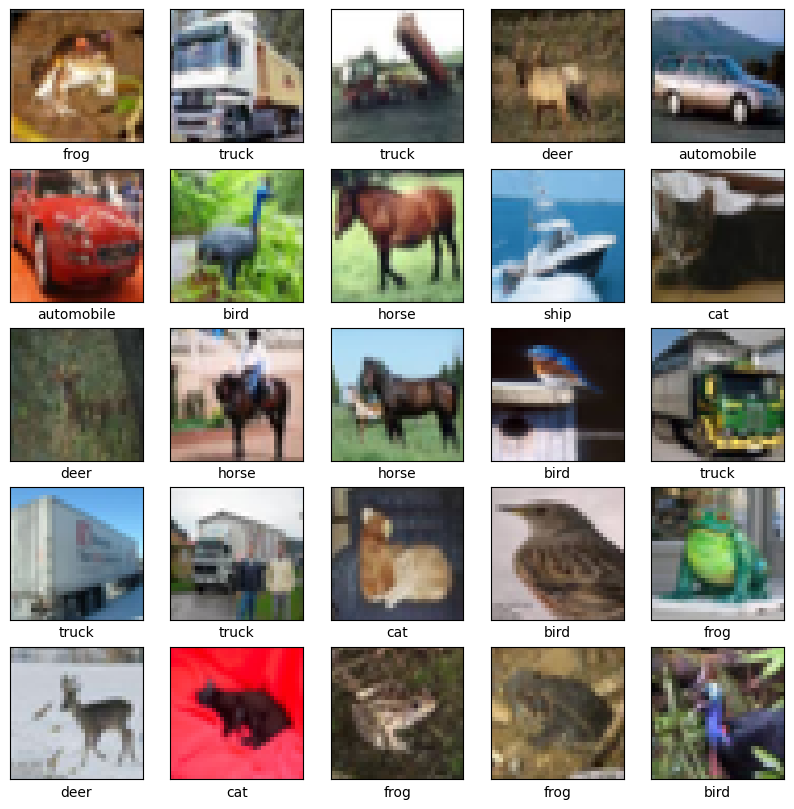

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [11]:
CNN = models.Sequential()

CNN.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
CNN.add(layers.MaxPooling2D((2, 2)))
CNN.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN.add(layers.MaxPooling2D((2, 2)))
CNN.add(layers.Conv2D(64, (3, 3), activation='relu'))


CNN.add(layers.Flatten())
CNN.add(layers.Dense(64, activation='relu'))
CNN.add(layers.Dense(10))


In [5]:
CNN.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = CNN.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 109s 68ms/step - loss: 1.5242 - accuracy: 0.4446 - val_loss: 1.2200 - val_accuracy: 0.5627
Epoch 2/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.1456 - accuracy: 0.5956 - val_loss: 1.0601 - val_accuracy: 0.6258
Epoch 3/10
1563/1563 [==============================] - 82s 53ms/step - loss: 1.0043 - accuracy: 0.6453 - val_loss: 0.9937 - val_accuracy: 0.6551
Epoch 4/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.9124 - accuracy: 0.6801 - val_loss: 0.9275 - val_accuracy: 0.6753
Epoch 5/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.8405 - accuracy: 0.7061 - val_loss: 0.9557 - val_accuracy: 0.6667
Epoch 6/10
1563/1563 [==============================] - 84s 53ms/step - loss: 0.7818 - accuracy: 0.7277 - val_loss: 0.8663 - val_accuracy: 0.7016
Epoch 7/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.7272 - accuracy: 0.7458 - val_loss: 0.8923

313/313 - 4s - loss: 0.8570 - accuracy: 0.7158 - 4s/epoch - 13ms/step


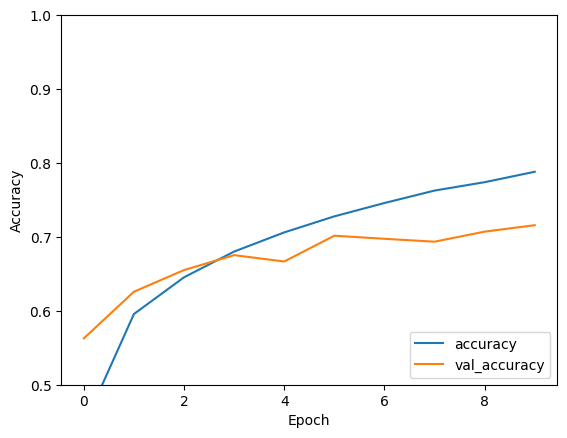

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


test_loss, test_acc = CNN.evaluate(x_test,  y_test, verbose=2)

In [7]:
print(f"Accuracy Score: {test_acc*100}")

Accuracy Score: 71.57999873161316


# Assignment 6

In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [25]:
data=pd.read_csv("/content/connsumerComplaintsSmall.csv")

In [26]:
texts = data['Consumer complaint narrative'].astype(str)
labels = data['Product']

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [27]:
vocab_size = 10000


tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


max_seq_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length, padding='post', truncating='post')

In [28]:

label_encoder = LabelEncoder()
all_labels = np.concatenate((y_train, y_test))
label_encoder.fit(all_labels)


y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(label_encoder.classes_)

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length=max_seq_length),
    tf.keras.layers.SimpleRNN(128, return_sequences=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(X_train_pad, y_train_encoded, epochs=12, batch_size=64, validation_data=(X_test_pad, y_test_encoded))

Epoch 1/12
2/2 [==============================] - 4s 886ms/step - loss: 1.8501 - accuracy: 0.1500 - val_loss: 1.3266 - val_accuracy: 0.7619
Epoch 2/12
2/2 [==============================] - 1s 361ms/step - loss: 1.2657 - accuracy: 0.8000 - val_loss: 1.1199 - val_accuracy: 0.7619
Epoch 3/12
2/2 [==============================] - 1s 328ms/step - loss: 0.9836 - accuracy: 0.8000 - val_loss: 1.0635 - val_accuracy: 0.7619
Epoch 4/12
2/2 [==============================] - 1s 304ms/step - loss: 0.8945 - accuracy: 0.8000 - val_loss: 1.0798 - val_accuracy: 0.7619
Epoch 5/12
2/2 [==============================] - 0s 185ms/step - loss: 0.8635 - accuracy: 0.8000 - val_loss: 1.0877 - val_accuracy: 0.7619
Epoch 6/12
2/2 [==============================] - 0s 185ms/step - loss: 0.8485 - accuracy: 0.8000 - val_loss: 1.0890 - val_accuracy: 0.7619
Epoch 7/12
2/2 [==============================] - 0s 184ms/step - loss: 0.8281 - accuracy: 0.8000 - val_loss: 1.0894 - val_accuracy: 0.7619
Epoch 8/12
2/2 [====

In [31]:
test_loss, test_acc = model.evaluate(X_test_pad, y_test_encoded)
print("Test accuracy:", test_acc)


1/1 [==============================] - 0s 66ms/step - loss: 1.1693 - accuracy: 0.7619
Test accuracy: 0.761904776096344


In [32]:

example_text = ["I am facing issues with my credit card statement."]
example_seq = tokenizer.texts_to_sequences(example_text)
example_pad = pad_sequences(example_seq, maxlen=max_seq_length, padding='post', truncating='post')
predicted_class = np.argmax(model.predict(example_pad), axis=-1)
predicted_product = label_encoder.inverse_transform(predicted_class)[0]
print("Predicted Product:", predicted_product)

1/1 [==============================] - 0s 348ms/step
Predicted Product: Credit reporting, credit repair services, or other personal consumer reports


#Assignment 7

In [33]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [34]:
train_data = pd.read_csv('/content/emotion-labels-train.csv')
test_data = pd.read_csv('/content/emotion-labels-test.csv')


X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']


tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_seq_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length, padding='post', truncating='post')

In [36]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 64, input_length=max_seq_length),
    tf.keras.layers.SimpleRNN(128, return_sequences=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test_encoded))

Epoch 1/10
57/57 [==============================] - 19s 281ms/step - loss: 1.3842 - accuracy: 0.2942 - val_loss: 1.3901 - val_accuracy: 0.2272
Epoch 2/10
57/57 [==============================] - 15s 268ms/step - loss: 1.3844 - accuracy: 0.3097 - val_loss: 1.4004 - val_accuracy: 0.2419
Epoch 3/10
57/57 [==============================] - 18s 315ms/step - loss: 1.3941 - accuracy: 0.2809 - val_loss: 1.4248 - val_accuracy: 0.2463
Epoch 4/10
57/57 [==============================] - 17s 302ms/step - loss: 1.3918 - accuracy: 0.2884 - val_loss: 1.4625 - val_accuracy: 0.2400
Epoch 5/10
57/57 [==============================] - 22s 388ms/step - loss: 1.3928 - accuracy: 0.2998 - val_loss: 1.3803 - val_accuracy: 0.3167
Epoch 6/10
57/57 [==============================] - 16s 277ms/step - loss: 1.3870 - accuracy: 0.2867 - val_loss: 1.3804 - val_accuracy: 0.3167
Epoch 7/10
57/57 [==============================] - 16s 276ms/step - loss: 1.3812 - accuracy: 0.3009 - val_loss: 1.3770 - val_accuracy: 0.3167

In [39]:
test_loss, test_acc = model.evaluate(X_test_pad, y_test_encoded)
print("Test accuracy:", test_acc)


99/99 [==============================] - 4s 35ms/step - loss: 1.3926 - accuracy: 0.2470
Test accuracy: 0.24697645008563995


In [40]:
example_text = ["I am feeling happy today."]
example_seq = tokenizer.texts_to_sequences(example_text)
example_pad = pad_sequences(example_seq, maxlen=max_seq_length, padding='post', truncating='post')
predicted_class = np.argmax(model.predict(example_pad), axis=-1)
predicted_emotion = label_encoder.inverse_transform(predicted_class)[0]
print("Predicted Emotion:", predicted_emotion)

1/1 [==============================] - 0s 316ms/step
Predicted Emotion: anger
